# Exploratory Data Analysis for Machine Learning

Sections required in your report:

* Brief description of the data set and a summary of its attributes
* Initial plan for data exploration
* Actions taken for data cleaning and feature engineering
* Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
* Formulating at least 3 hypothesis about this data
* Conducting a formal significance test for one of the hypotheses and discuss the results 
* Suggestions for next steps in analyzing this data
* A paragraph that summarizes the quality of this data set and a request for additional data if needed

In [302]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set()

#### Load data, Examine and Explore

In [220]:
data = pd.read_csv('data/Ames_Housing_Data.tsv', sep = '\t')

In [221]:
#Examine columns for missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

Lot of colums have lot of missing values.

In [222]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [223]:
print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])

Number of rows in the data: 2930
Number of columns in the data: 82


In [224]:
data.describe().T.sort_values(by = 'count')

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2440.00000,69.22459,23.36533,21.00000,58.00000,68.00000,80.00000,313.00000
Garage Yr Blt,2771.00000,1978.13244,25.52841,1895.00000,1960.00000,1979.00000,2002.00000,2207.00000
Mas Vnr Area,2907.00000,101.89680,179.11261,0.00000,0.00000,0.00000,164.00000,1600.00000
Bsmt Half Bath,2928.00000,0.06113,0.24525,0.00000,0.00000,0.00000,0.00000,2.00000
Bsmt Full Bath,2928.00000,0.43135,0.52482,0.00000,0.00000,0.00000,1.00000,3.00000
Garage Cars,2929.00000,1.76681,0.76057,0.00000,1.00000,2.00000,2.00000,5.00000
Garage Area,2929.00000,472.81973,215.04655,0.00000,320.00000,480.00000,576.00000,1488.00000
Total Bsmt SF,2929.00000,1051.61454,440.61507,0.00000,793.00000,990.00000,1302.00000,6110.00000
Bsmt Unf SF,2929.00000,559.26255,439.49415,0.00000,219.00000,466.00000,802.00000,2336.00000
BsmtFin SF 2,2929.00000,49.72243,169.16848,0.00000,0.00000,0.00000,0.00000,1526.00000


In [225]:
data.describe(include = 'object').T

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


#### Checking for missing values and dealing with them

In [226]:
missingdata = data.isnull().sum().sort_values()
missingdata.tail(10)

Garage Finish     159
Garage Cond       159
Garage Yr Blt     159
Garage Qual       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

[Text(66.5, 0.5, 'Data Points'),
 Text(0.5, 48.453125, 'Columns'),
 Text(0.5, 1, 'Missing data')]

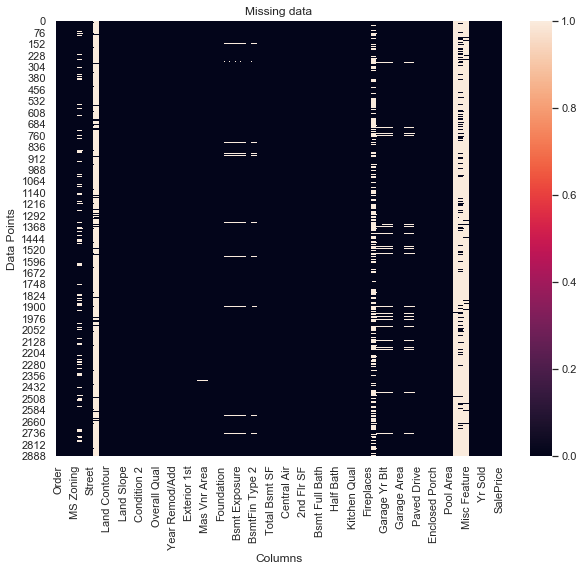

In [227]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.isnull()).set(title = 'Missing data', xlabel = 'Columns', ylabel = 'Data Points')

1.  Fireplace Qu      
2.  Fence   
3.  Alley 
4.  Misc Feature  
5.  Pool QC 

These have too much missing data so we can remove them

In [228]:
data = data.drop(['Fireplace Qu','Fence','Alley','Misc Feature','Pool QC'], axis = 1) 

In [229]:
data.isnull().sum().sort_values()

Order              0
Heating            0
Heating QC         0
Central Air        0
1st Flr SF         0
                ... 
Garage Cond      159
Garage Qual      159
Garage Finish    159
Garage Yr Blt    159
Lot Frontage     490
Length: 77, dtype: int64

[Text(66.5, 0.5, 'Data Points'),
 Text(0.5, 48.453125, 'Columns'),
 Text(0.5, 1, 'Missing data')]

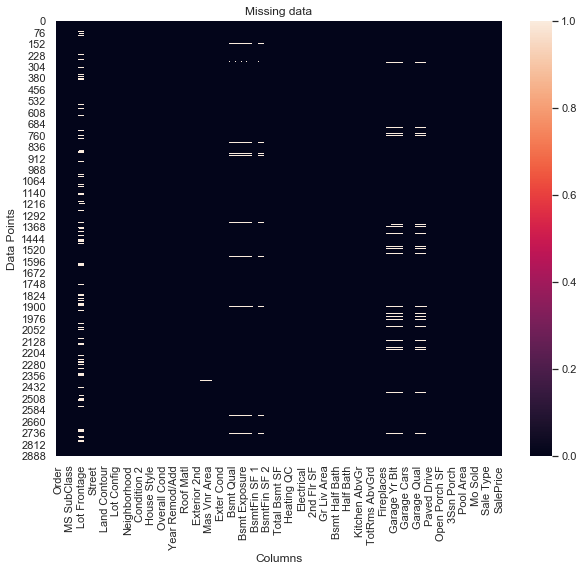

In [230]:
sns.heatmap(data.isnull()).set(title = 'Missing data', xlabel = 'Columns', ylabel = 'Data Points')

In [231]:
print('Unique values in Mas Vnr Type',data['Mas Vnr Type'].unique())
data['Mas Vnr Type'].value_counts()

Unique values in Mas Vnr Type ['Stone' 'None' 'BrkFace' nan 'BrkCmn' 'CBlock']


None       1752
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

This column have most of 'None' type so we replace missing values to None 

In [232]:
data['Mas Vnr Type'].fillna('None', inplace = True)

In [233]:
print('Unique values in Bsmt Qual',data['Bsmt Qual'].unique())
data['Bsmt Qual'].value_counts()

Unique values in Bsmt Qual ['TA' 'Gd' 'Ex' nan 'Fa' 'Po']


TA    1283
Gd    1219
Ex     258
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64

In [234]:
data['Bsmt Qual'].fillna('TA', inplace = True)

This column have most of 'TA' type so we replace missing values to TA 

In [235]:
print('Unique values in Garage Cond',data['Garage Cond'].unique())
data['Garage Cond'].value_counts()

Unique values in Garage Cond ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64

In [236]:
data['Garage Cond'].fillna('TA', inplace = True)

In [237]:
print('Unique values in Garage Qual',data['Garage Qual'].unique())
data['Garage Qual'].value_counts()

Unique values in Garage Qual ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


TA    2615
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64

In [238]:
data['Garage Qual'].fillna('TA', inplace = True)

In [239]:
print('Unique values in Garage Finish',data['Garage Finish'].unique())
data['Garage Finish'].value_counts()

Unique values in Garage Finish ['Fin' 'Unf' 'RFn' nan]


Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64

In [240]:
data['Garage Finish'].fillna('Unf', inplace = True)

In [241]:
print('Unique values in Garage Type',data['Garage Type'].unique())
data['Garage Type'].value_counts()

Unique values in Garage Type ['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan 'CarPort' '2Types']


Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

In [242]:
data['Garage Type'].fillna('Attchd', inplace = True)

In [243]:
print('Unique values in Bsmt Exposure',data['Bsmt Exposure'].unique())
data['Bsmt Exposure'].value_counts()

Unique values in Bsmt Exposure ['Gd' 'No' 'Mn' 'Av' nan]


No    1906
Av     418
Gd     284
Mn     239
Name: Bsmt Exposure, dtype: int64

In [244]:
data['Bsmt Exposure'].fillna('No', inplace = True)

In [245]:
print('Unique values in BsmtFin Type 2',data['BsmtFin Type 2'].unique())
data['BsmtFin Type 2'].value_counts()

Unique values in BsmtFin Type 2 ['Unf' 'LwQ' 'BLQ' 'Rec' nan 'GLQ' 'ALQ']


Unf    2499
Rec     106
LwQ      89
BLQ      68
ALQ      53
GLQ      34
Name: BsmtFin Type 2, dtype: int64

In [246]:
data['BsmtFin Type 2'].fillna('Unf', inplace = True)

In [247]:
print('Unique values in Bsmt Cond',data['Bsmt Cond'].unique())
data['Bsmt Cond'].value_counts()

Unique values in Bsmt Cond ['Gd' 'TA' nan 'Po' 'Fa' 'Ex']


TA    2616
Gd     122
Fa     104
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [248]:
data['Bsmt Cond'].fillna('TA', inplace = True)

In [249]:
print('Unique values in BsmtFin Type 1',data['BsmtFin Type 1'].unique())
data['BsmtFin Type 1'].value_counts()

Unique values in BsmtFin Type 1 ['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ' nan]


GLQ    859
Unf    851
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFin Type 1, dtype: int64

In [250]:
data['BsmtFin Type 1'].fillna('GLQ', inplace = True)

In [251]:
print('Unique values in Electrical',data['Electrical'].unique())
data['Electrical'].value_counts()

Unique values in Electrical ['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan 'Mix']


SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [252]:
data['Electrical'].fillna('GLQ', inplace = True)

In [253]:
data['Lot Frontage'].describe()

count   2440.00000
mean      69.22459
std       23.36533
min       21.00000
25%       58.00000
50%       68.00000
75%       80.00000
max      313.00000
Name: Lot Frontage, dtype: float64

Filling missing values using mean 

In [254]:
data['Lot Frontage'].fillna(69.22, inplace = True)

In [255]:
data['Garage Yr Blt'].value_counts()

2005.00000    142
2006.00000    115
2007.00000    115
2004.00000     99
2003.00000     92
             ... 
1919.00000      1
2207.00000      1
1933.00000      1
1908.00000      1
1943.00000      1
Name: Garage Yr Blt, Length: 103, dtype: int64

In [256]:
data['Garage Yr Blt'].fillna(2005, inplace = True)

In [257]:
data['Mas Vnr Area'].describe()

count   2907.00000
mean     101.89680
std      179.11261
min        0.00000
25%        0.00000
50%        0.00000
75%      164.00000
max     1600.00000
Name: Mas Vnr Area, dtype: float64

In [258]:
data['Mas Vnr Area'].fillna(101, inplace = True)

In [259]:
data['Bsmt Half Bath'].describe()

count   2928.00000
mean       0.06113
std        0.24525
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        2.00000
Name: Bsmt Half Bath, dtype: float64

In [260]:
data['Bsmt Half Bath'].fillna(0.06, inplace = True)

In [261]:
data['Bsmt Full Bath'].describe()

count   2928.00000
mean       0.43135
std        0.52482
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        3.00000
Name: Bsmt Full Bath, dtype: float64

In [262]:
data['Bsmt Full Bath'].fillna(0.43, inplace = True)

In [263]:
data['BsmtFin SF 1'].describe()

count   2929.00000
mean     442.62957
std      455.59084
min        0.00000
25%        0.00000
50%      370.00000
75%      734.00000
max     5644.00000
Name: BsmtFin SF 1, dtype: float64

In [264]:
data['BsmtFin SF 1'].fillna(443, inplace = True)

In [265]:
data['Garage Cars'].describe()

count   2929.00000
mean       1.76681
std        0.76057
min        0.00000
25%        1.00000
50%        2.00000
75%        2.00000
max        5.00000
Name: Garage Cars, dtype: float64

In [266]:
data['Garage Cars'].fillna(2, inplace = True)

In [267]:
data['Total Bsmt SF'].describe()

count   2929.00000
mean    1051.61454
std      440.61507
min        0.00000
25%      793.00000
50%      990.00000
75%     1302.00000
max     6110.00000
Name: Total Bsmt SF, dtype: float64

In [268]:
data['Total Bsmt SF'].fillna(1052, inplace = True)

In [269]:
data['Bsmt Unf SF'].describe()

count   2929.00000
mean     559.26255
std      439.49415
min        0.00000
25%      219.00000
50%      466.00000
75%      802.00000
max     2336.00000
Name: Bsmt Unf SF, dtype: float64

In [270]:
data['Bsmt Unf SF'].fillna(559, inplace = True)

In [271]:
data['BsmtFin SF 2'].describe()

count   2929.00000
mean      49.72243
std      169.16848
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max     1526.00000
Name: BsmtFin SF 2, dtype: float64

In [272]:
data['BsmtFin SF 2'].fillna(49, inplace = True)

In [273]:
data['Garage Area'].describe()

count   2929.00000
mean     472.81973
std      215.04655
min        0.00000
25%      320.00000
50%      480.00000
75%      576.00000
max     1488.00000
Name: Garage Area, dtype: float64

In [274]:
data['Garage Area'].fillna(473, inplace = True)

In [275]:
stats = data.describe().T
pd.set_option('display.float_format', lambda x: '%.5f' % x)
stats

,count,mean,std,min,25%,50%,75%,max
Order,2930.00000,1465.50000,845.96247,1.00000,733.25000,1465.50000,2197.75000,2930.00000
PID,2930.00000,714464496.98874,188730844.64939,526301100.00000,528477022.50000,535453620.00000,907181097.50000,1007100110.00000
MS SubClass,2930.00000,57.38737,42.63802,20.00000,20.00000,50.00000,70.00000,190.00000
Lot Frontage,2930.00000,69.22382,21.32152,21.00000,60.00000,69.22000,78.00000,313.00000
Lot Area,2930.00000,10147.92184,7880.01776,1300.00000,7440.25000,9436.50000,11555.25000,215245.00000
Overall Qual,2930.00000,6.09488,1.41103,1.00000,5.00000,6.00000,7.00000,10.00000
Overall Cond,2930.00000,5.56314,1.11154,1.00000,5.00000,5.00000,6.00000,9.00000
Year Built,2930.00000,1971.35631,30.24536,1872.00000,1954.00000,1973.00000,2001.00000,2010.00000
Year Remod/Add,2930.00000,1984.26655,20.86029,1950.00000,1965.00000,1993.00000,2004.00000,2010.00000
Mas Vnr Area,2930.00000,101.88976,178.40800,0.00000,0.00000,0.00000,162.75000,1600.00000


In [276]:
data.describe(include = 'object').T 

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522
Condition 2,2930,8,Norm,2900


In [277]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

Here SalePrice is dependent variable and others are independent variable

In [278]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


As house get newer selling price increase

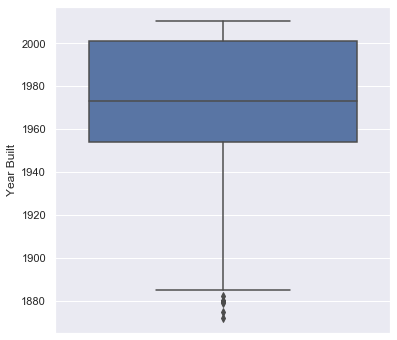

In [279]:
sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(y = 'Year Built', data = data)

There some outliners but they can be consider original data as house can be built that time

[Text(0.5, 1.0, 'Before Outliner')]

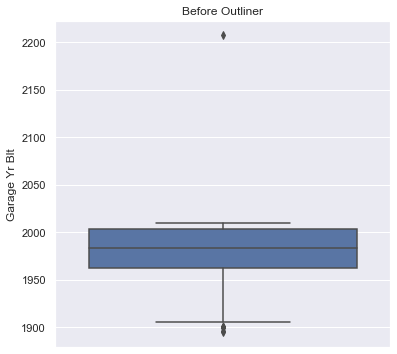

In [280]:
sns.boxplot(y = 'Garage Yr Blt', data = data).set(title = 'Before Outliner')

There are some outliner that need to remove

In [281]:
data['Garage Yr Blt'].value_counts()

2005.00000    301
2006.00000    115
2007.00000    115
2004.00000     99
2003.00000     92
             ... 
1919.00000      1
2207.00000      1
1933.00000      1
1908.00000      1
1943.00000      1
Name: Garage Yr Blt, Length: 103, dtype: int64

In [282]:
data.loc[data['Garage Yr Blt'] > 2020, 'Garage Yr Blt'] = 2005

[Text(0.5, 1.0, 'After removing Outliner')]

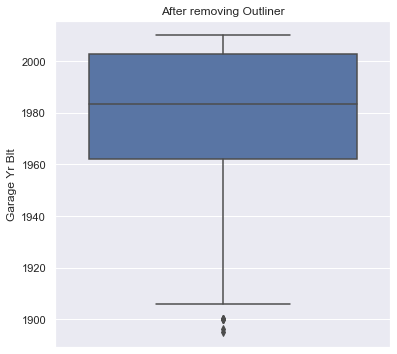

In [283]:
sns.boxplot(y = 'Garage Yr Blt', data = data).set(title = 'After removing Outliner')

#### Data Visualization

Basic plan for visulaization as follows : 
* Find relationship between different with sale price of house.
* Ploting different plot to get insights 

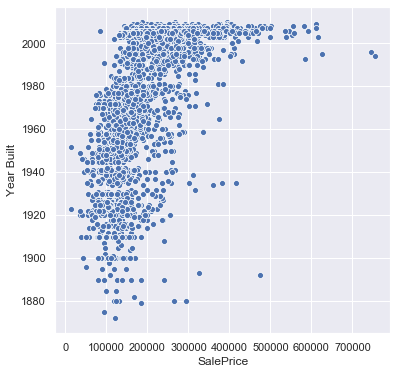

In [284]:
sns.scatterplot(x = 'SalePrice', y = 'Year Built', data = data)

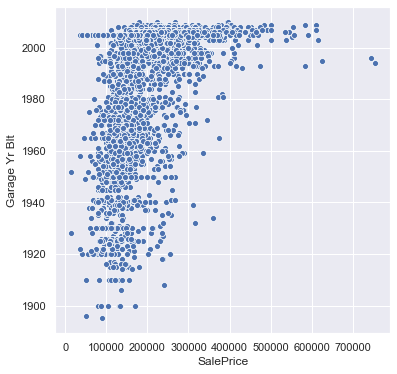

In [285]:
sns.scatterplot(x = 'SalePrice', y = 'Garage Yr Blt', data = data)

Year Built and Garage Yr Blt have some linear relationship with sale price of house.

In [286]:
data['Full Bath'].value_counts()

2    1532
1    1318
3      64
0      12
4       4
Name: Full Bath, dtype: int64

Full bath contains 4 distinct as 0, 1, 2, 3, 4 that shows having number of full bathrooms 

In [287]:
data['Half Bath'].value_counts()

0    1843
1    1062
2      25
Name: Half Bath, dtype: int64

Half bath contains 3 distinct as 0, 1, 2 that shows having number of half bathrooms

In [288]:
data['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64

MS Zoning have 6 distinct values.

In [289]:
data['Overall Qual'].value_counts()

5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: Overall Qual, dtype: int64

Overall Qual contains values for 1 to 10 as it is rating varialbe

In [290]:
correlation = data.corr()
correlation.tail(1).T

,SalePrice
Order,-0.03141
PID,-0.24652
MS SubClass,-0.08509
Lot Frontage,0.34075
Lot Area,0.26655
Overall Qual,0.79926
Overall Cond,-0.10170
Year Built,0.55843
Year Remod/Add,0.53297
Mas Vnr Area,0.50576


Here we take correlation between different attribute with sale price.
We consider attribute having correlation value having greater than 0.5

In [291]:
small_data = data[['Overall Qual',
                   'Year Built',
                   'Year Remod/Add',
                   'Mas Vnr Area',
                   'Total Bsmt SF',
                   '1st Flr SF',
                   'Gr Liv Area',
                   'Full Bath',
                   'Garage Cars',
                   'Garage Area',
                   'SalePrice']]

[Text(0.5, 1, 'Feature Correction')]

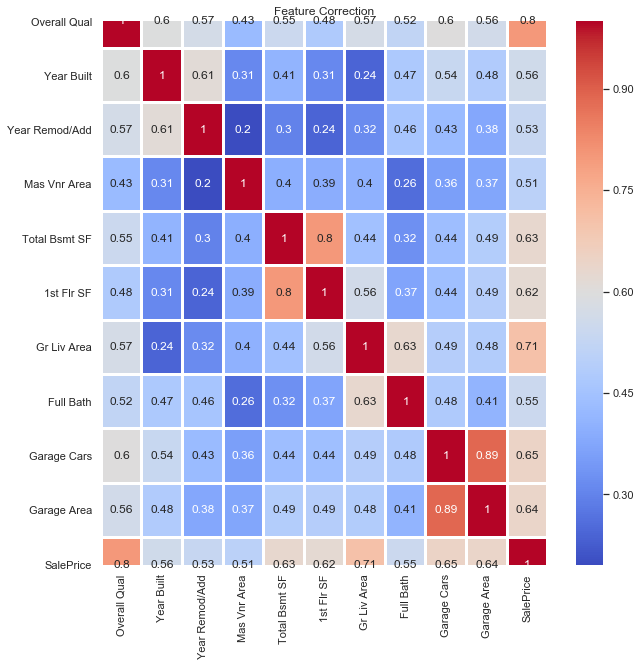

In [292]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(small_data.corr(), annot = True, linewidths = 2, linecolor = 'white', cmap = 'coolwarm').set(title = 'Feature Correction')

This attribute have high correlation with SalePrice
* Overall Qual
* Year Built
* Year Remod/Add
* Mas Vnr Area
* Total Bsmt SF
* 1st Flr SF
* Gr Liv Area
* Full Bath
* Garage Cars
* Garage Area

So this attribute can used as key feature

Tying to finding relationship with other attribute to saleprice

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


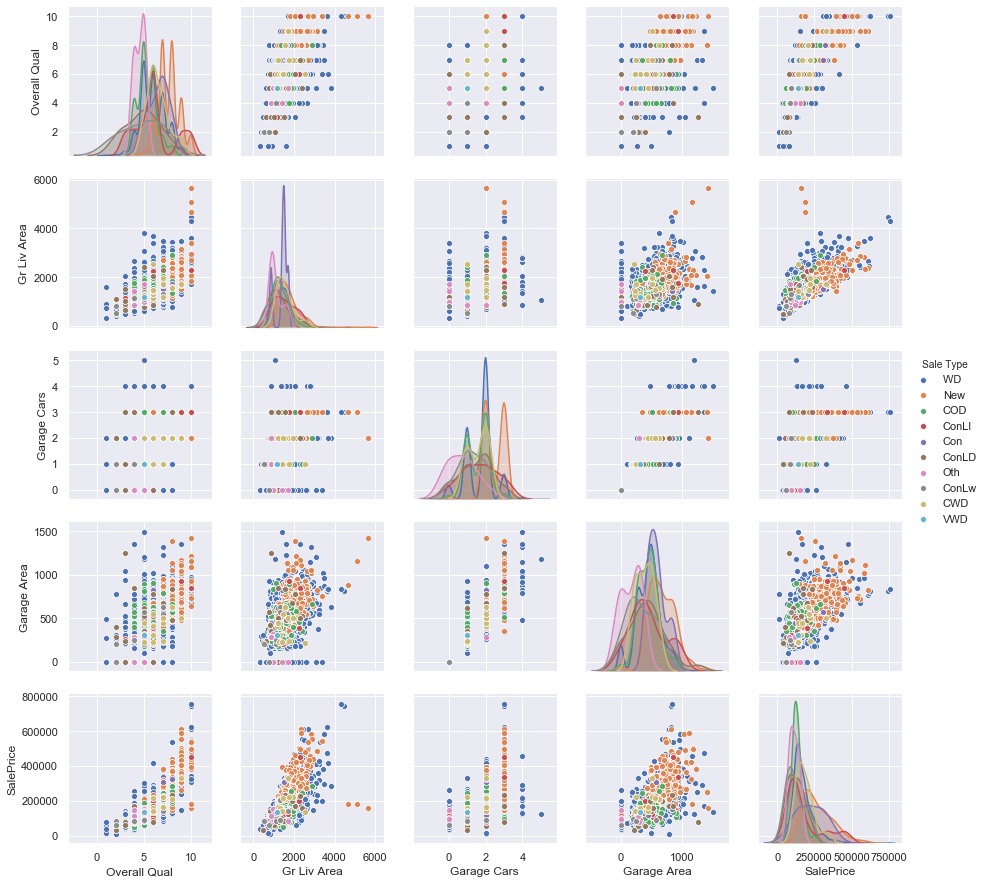

In [293]:
sns.pairplot(data[['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Sale Type','SalePrice']], hue = 'Sale Type')

#### Sale Price analysis

This below diagrams shows average sale price according to sale condition and **partial** codition house have higher selling price  

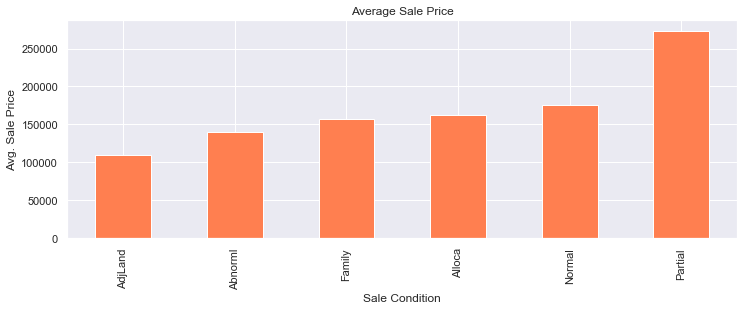

In [294]:
fig = plt.figure(figsize=(12, 4))
data.groupby('Sale Condition')['SalePrice'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Average Sale Price')
plt.xlabel("Sale Condition")
plt.ylabel('Avg. Sale Price')
plt.show()

This below diagrams shows average sale price according to sale type and as accepted **new** house have higher selling price  

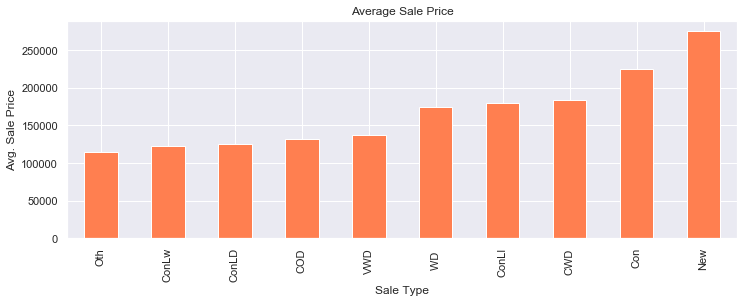

In [295]:
fig = plt.figure(figsize=(12, 4))
data.groupby('Sale Type')['SalePrice'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Average Sale Price')
plt.xlabel("Sale Type")
plt.ylabel('Avg. Sale Price')
plt.show()

<Figure size 864x864 with 0 Axes>

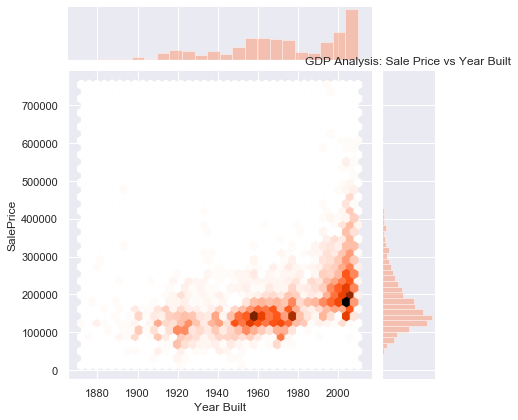

In [318]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'Year Built', y= 'SalePrice', kind= 'hex',color='coral')
plt.title('GDP Analysis: Sale Price vs Year Built')
plt.show()

From the figure, it clear that as newly built house have higher sale price

<Figure size 864x864 with 0 Axes>

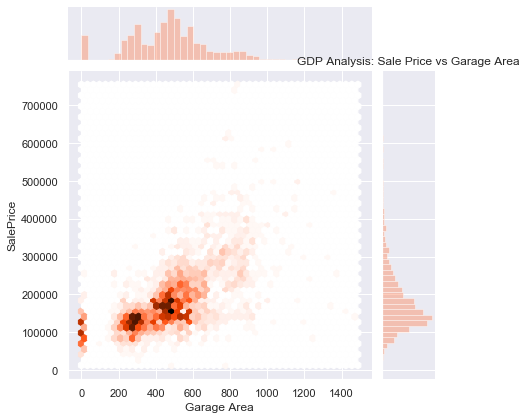

In [320]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'Garage Area', y= 'SalePrice', kind= 'hex',color='coral')
plt.title('GDP Analysis: Sale Price vs Garage Area')
plt.show()

From the fig, it clear that having larger garage not help to get higher sale price

<Figure size 864x864 with 0 Axes>

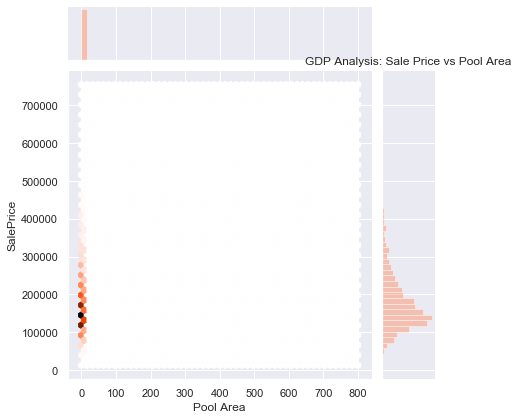

In [321]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'Pool Area', y= 'SalePrice', kind= 'hex',color='coral')
plt.title('GDP Analysis: Sale Price vs Pool Area')
plt.show()

Their is no relationship between pool area and sale price 

In [322]:
key_data = data[['Overall Qual',
                   'Year Built',
                   'Year Remod/Add',
                   'Mas Vnr Area',
                   'Total Bsmt SF',
                   '1st Flr SF',
                   'Gr Liv Area',
                   'Full Bath',
                   'Garage Cars',
                   'Garage Area',
                   'SalePrice']] 

 This attribute have high relation with sale price, so we can train our model with this feature and with full data to check accuracy 

# Hypothesis Testing


We test our hypothesis for attritube Overall Qual, Gr Liv Area and Garage Area to check predictive power.

* Null Hypothesis: There is no predictive power
* Alternative Hypothesis: There is a predictive power

If the P-value is lower than 0.05, we can reject the null hypothesis and conclude that it exist a relationship between the variables.

In [342]:
import scipy.stats as stats
_,p_value=stats.ttest_1samp(a=data['Overall Qual'],popmean=data['SalePrice'].mean())

In [343]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


Their are relationship exist between Overall Qual and SalePrice

In [359]:
_,p_value=stats.ttest_1samp(a=data['Gr Liv Area'],popmean=data['SalePrice'].mean())
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


Their are relationship exist between Gr Liv Area and SalePrice

In [360]:
_,p_value=stats.ttest_1samp(a=data['Garage Area'],popmean=data['SalePrice'].mean())
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


Their are relationship exist between Garage Area and SalePrice

## Suggestions for next steps in analyzing this data

Further analysis include trying to some kind of relationship with different attribute

## Summarizes the quality of this data set and a request for additional data if needed

This dataset is a classic dataset and it is excellent for learning probabilities and how different groups can have different outcomes based on different characteristics.
